data copying
fitting sine
fitting curve generation
now plotting


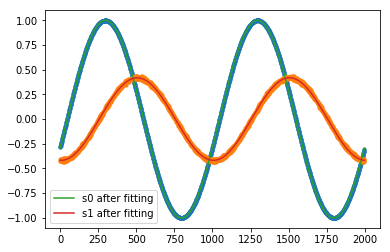

Wall time: 3.94 s


In [1]:
%%time
# %load fitExample.py
import rpyc
import fitSine as fs
import numpy as np
import matplotlib.pyplot as plt
conn=rpyc.connect('localhost',18861)
status = conn.root.getStatus()
nT=2
ch=0
freq=4000
if (status['isRecording']== True):
    print 'please finish recording first'
else:
    data0, data1 = conn.root.getScopeData(ch,freq)
    print 'data copying'
    d0=list(data0)
    d1=list(data1)
    print 'fitting sine'
    R0, T0, M0 = fs.sineFit2Cycle(d0,nT)
    R1, T1, M1 = fs.sineFit2Cycle(d1,nT)
    
# recreate the fitted curve using the optimized parameters
    N = len(data0)  # number of data points
    t = np.linspace(0, 2*nT*np.pi, N)
    print 'fitting curve generation'
    data_fit0 = R0*np.sin(t+T0) # + M0
    data_fit1 = R1*np.sin(t+T1) # + M1

    print 'now plotting'
    plt.figure()
    plt.plot(d0-M0, '.')
    plt.plot([1*x for x in d1-M1], '.')
    plt.plot(data_fit0, label='s0 after fitting')
    plt.plot([1*x for x in data_fit1], label='s1 after fitting')
    plt.legend()
    plt.show()